In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [26]:
# Путь к файлу JSON
json_file_path = "BM_iterative_movielens.json"

# Загружаем JSON данные из файла
with open(json_file_path, 'r') as file:
    data = json.load(file)

# Извлекаем список бенчмарков
benchmarks = data["benchmarks"]

# Создаем DataFrame из списка бенчмарков
df = pd.DataFrame(benchmarks, columns=["name",  "real_time", "cpu_time"])

df[['algorithm_dataset', 'sample', 'iterations']] = df['name'].str.split('/', expand=True)
df = df.drop(['name', 'iterations'], axis=1)

df['sample'] = df['sample'].str.split('-', expand=True)[1]

df[['algorithm', 'dataset']] = df['algorithm_dataset'].str.rsplit('_', expand=True, n=1)
df = df.drop(['algorithm_dataset'], axis=1)
df['algorithm'] = df['algorithm'] .str.split('_', expand=True)[1]

df['real_time'] = df['real_time'].apply(lambda x : round(x, 2))
df['cpu_time'] = df['cpu_time'].apply(lambda x : round(x, 2))

column_order = ['algorithm', 'dataset', 'sample', 'real_time', 'cpu_time']
df = df[column_order]

for alg, table in df.groupby(by='algorithm'):
    table.sort_values(by='sample', ascending=True)
    table.to_excel(f"{alg}_results.xlsx", index=False)

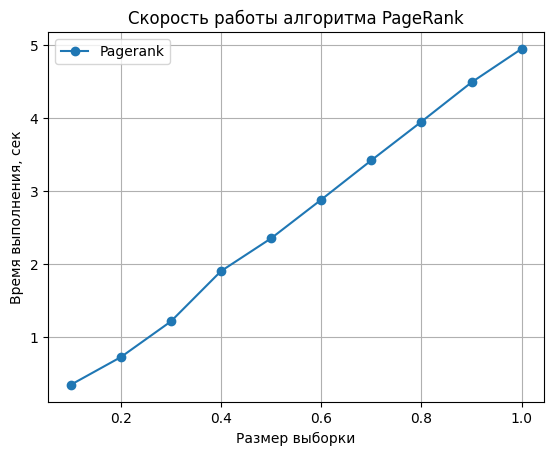

In [31]:
data = pd.read_excel('Pagerank_results.xlsx')
plt.plot(data['sample'], data['real_time'], label='Pagerank', marker='o')

# Добавляем название графика
plt.title('Скорость работы алгоритма PageRank')

# Добавляем метки осей с единицами измерения
plt.xlabel('Размер выборки')
plt.ylabel('Время выполнения, сек')

# Добавляем сетку
plt.grid(True)

# Отображаем легенду
plt.legend()

# Отображаем график
plt.show()

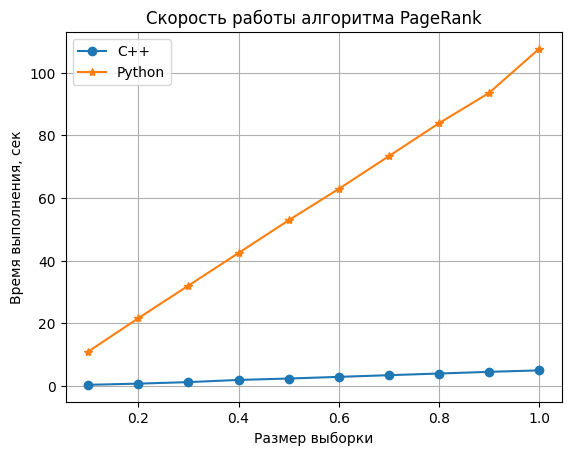

In [33]:
data = pd.read_excel('Pagerank_results.xlsx')
data_python = pd.read_csv('pagerank_time_results.csv')
plt.plot(data['sample'], data['real_time'], label='C++', marker='o')
plt.plot(data_python['Размер выборки'], data_python['Время выполнения'], label='Python', marker='*')
# Добавляем название графика
plt.title('Скорость работы алгоритма PageRank')

# Добавляем метки осей с единицами измерения
plt.xlabel('Размер выборки')
plt.ylabel('Время выполнения, сек')

# Добавляем сетку
plt.grid(True)

# Отображаем легенду
plt.legend()

# Отображаем график
plt.show()

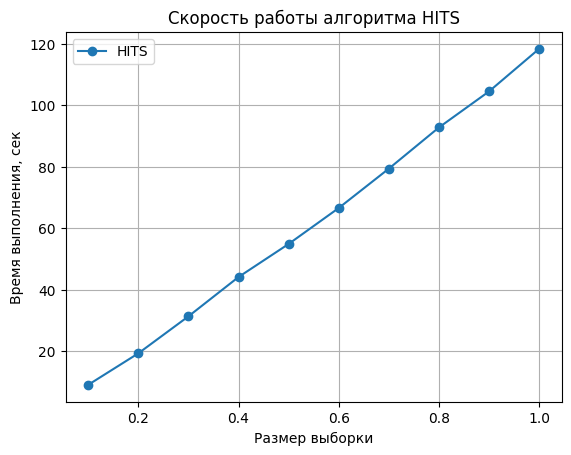

In [35]:
data = pd.read_excel('Hits_results.xlsx')
plt.plot(data['sample'], data['real_time'], label='HITS', marker='o')

# Добавляем название графика
plt.title('Скорость работы алгоритма HITS')

# Добавляем метки осей с единицами измерения
plt.xlabel('Размер выборки')
plt.ylabel('Время выполнения, сек')

# Добавляем сетку
plt.grid(True)

# Отображаем легенду
plt.legend()

# Отображаем график
plt.show()

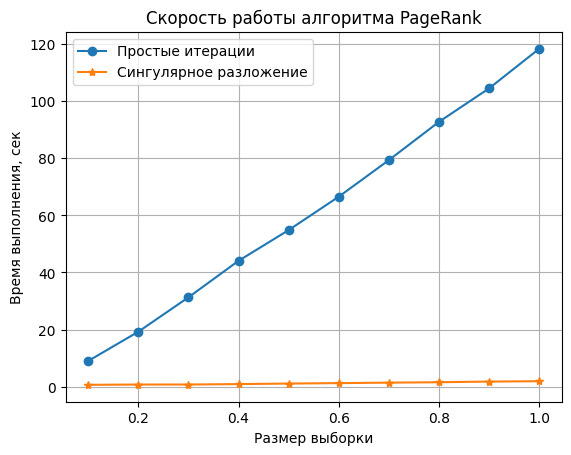

In [37]:
data = pd.read_excel('Hits_results.xlsx')
data_python = pd.read_csv('Hits_time_results.csv')
plt.plot(data['sample'], data['real_time'], label='Простые итерации', marker='o')
plt.plot(data_python['Размер выборки'], data_python['Время выполнения'], label='Сингулярное разложение', marker='*')
# Добавляем название графика
plt.title('Скорость работы алгоритма PageRank')

# Добавляем метки осей с единицами измерения
plt.xlabel('Размер выборки')
plt.ylabel('Время выполнения, сек')

# Добавляем сетку
plt.grid(True)

# Отображаем легенду
plt.legend()

# Отображаем график
plt.show()

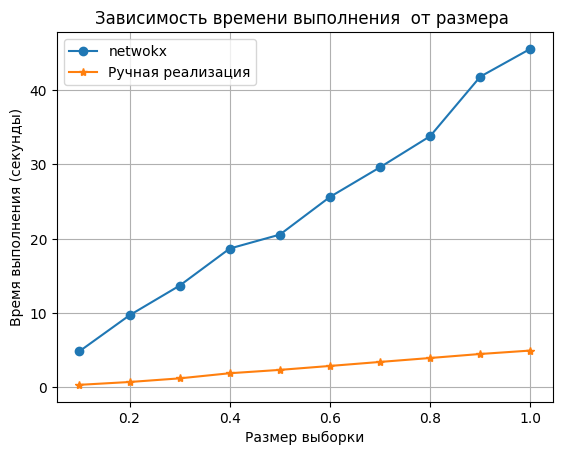

In [46]:

df = pd.read_excel('networkx_pagerank_time_results.xlsx')
plt.plot(df['Размер выборки'], df['Время выполнения'],
         marker='o', label='netwokx')


df = pd.read_excel('Pagerank_results.xlsx')
plt.plot(df['sample'], df['real_time'],
         marker='*', label='Ручная реализация')

plt.legend()

# Настраиваем оси и заголовок графика
plt.xlabel('Размер выборки')
plt.ylabel('Время выполнения (секунды)')
plt.title('Зависимость времени выполнения  от размера ')
plt.grid()

# Отображаем график
plt.show()

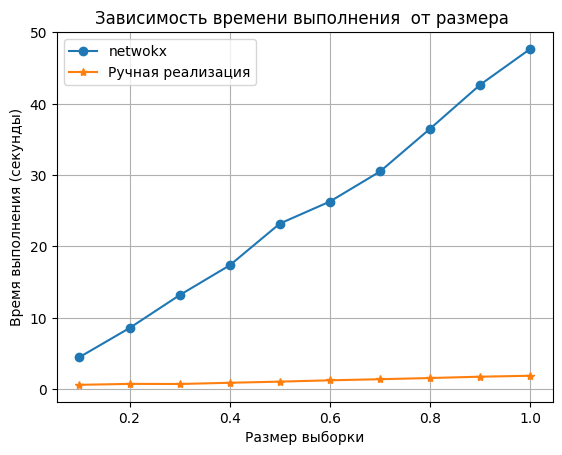

In [49]:
df = pd.read_excel('networkx_hits_time_results.xlsx')
plt.plot(df['Размер выборки'], df['Время выполнения'],
         marker='o', label='netwokx')


df = pd.read_csv('hits_time_results.csv')
plt.plot(df['Размер выборки'], df['Время выполнения'],
         marker='*', label='Ручная реализация')

plt.legend()

# Настраиваем оси и заголовок графика
plt.xlabel('Размер выборки')
plt.ylabel('Время выполнения (секунды)')
plt.title('Зависимость времени выполнения  от размера ')
plt.grid()

# Отображаем график
plt.show()